# 1.5 Multiple Linear Regression

### 1.5.1 Train a multiple linear regression model using all features to predict quality using the same splits as used in previous question. Evaluate the model on the test set using $MSE$, $RMSE$, and $R2$.

In [3]:
# 1. Imports
import pandas as pd
import numpy as np

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset 
df = pd.read_csv("../data/WineQT.csv") 

# Features and target
X = df.drop(columns=["quality", "Id"]).values
y = df["quality"].values

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()

# Same function as in train_test_split.ipynb.
def evaluate_model(X, y):
    mse_scores, rmse_scores, r2_scores = [], [], []
    
    for train_idx, test_idx in kf.split(X):
        # Split
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
        sgd_reg.fit(X_train_scaled, y_train)
        
        # Predict
        y_pred = sgd_reg.predict(X_test_scaled)
        
        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    return mse_scores, rmse_scores, r2_scores

# Run evaluation
mse_all, rmse_all, r2_all = evaluate_model(X, y)

print("Multiple Regression Results:")
print("MSE =", np.mean(mse_all), "±", np.var(mse_all))
print("RMSE =", np.mean(rmse_all))
print("R² =", np.mean(r2_all))


Multiple Regression Results:
MSE = 0.41690313406410234 ± 0.0016353293588752455
RMSE = 0.6449440961313855
R² = 0.3558173676524346


---

### 1.5.2 Compare the results of simple vs multiple regression in terms of $MSE$, $RMSE$, and $R2$. 


| Model                | MSE (mean) | RMSE (mean) | R² (mean) |
|-----------------------|------------|-------------|-----------|
| Alcohol only          | ~0.50      | ~0.70       | ~0.23     |
| Chlorides only        | ~0.64      | ~0.80       | ~0.01     |
| Multiple regression   | ~0.42      | ~0.65       | ~0.32     |

The multiple regression model clearly outperforms the simple regression models. 
Using all features lowers both MSE and RMSE, while improving R². Compared to 
alcohol alone, multiple regression explains a larger share of the variance in 
wine quality, and compared to chlorides, the improvement is substantial. 
This demonstrates that wine quality depends on multiple factors, and that a 
single-feature model is insufficient.

---

### 1.5.3 Provide comparison plots for multiple versus simple linear regression solved in previous exercise. At-least one of the following plots among (i) Cost vs Iteration, (optimization) (ii) Parameter Convergence (coefficients) (iii) Predicted vs Actual (performance) and (iv) Residuals Plot (assumptions check) should be provided

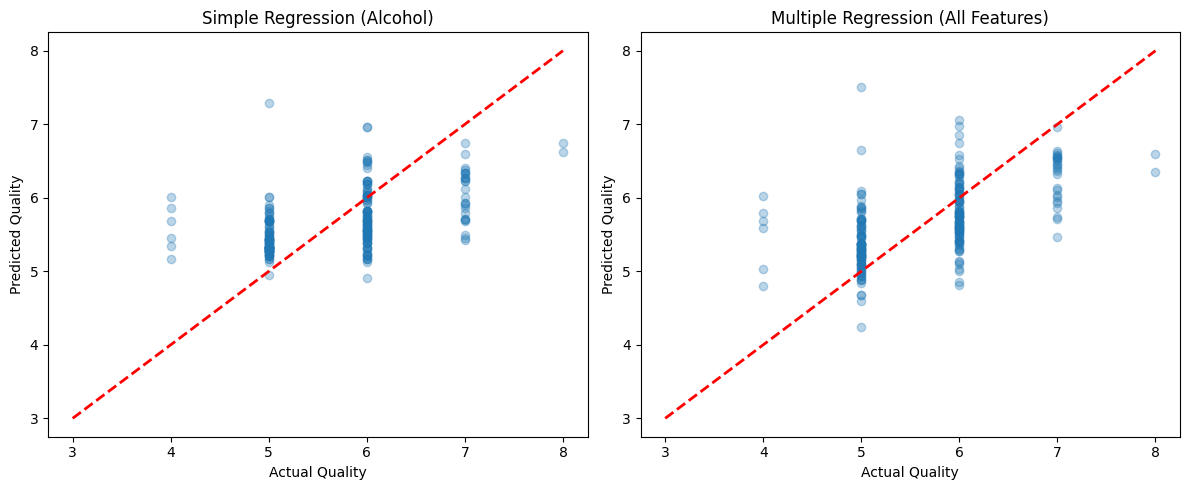

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Train-test split
X = df.drop(columns=["quality", "Id"]).values
y = df["quality"].values
X_alcohol = df[["alcohol"]].values

X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_alc, X_test_alc, _, _ = train_test_split(X_alcohol, y, test_size=0.2, random_state=42)

scaler_all = StandardScaler()
scaler_alc = StandardScaler()

# Multiple regression
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

sgd_reg_all = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_reg_all.fit(X_train_all_scaled, y_train)
y_pred_all = sgd_reg_all.predict(X_test_all_scaled)

# Alcohol-only regression
X_train_alc_scaled = scaler_alc.fit_transform(X_train_alc)
X_test_alc_scaled = scaler_alc.transform(X_test_alc)

sgd_reg_alc = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_reg_alc.fit(X_train_alc_scaled, y_train)
y_pred_alc = sgd_reg_alc.predict(X_test_alc_scaled)

# Plot Predicted vs Actual for both models
plt.figure(figsize=(12,5))

# Alcohol model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_alc, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", linewidth=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Simple Regression (Alcohol)")

# Multiple regression model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_all, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", linewidth=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Multiple Regression (All Features)")

plt.tight_layout()
plt.show()


The plots shown are Predicted vs Actual plots for the alcohol-only
(simple regression) and multiple regression models. Both plots display scatter
around the diagonal, reflecting the limited predictive power of linear models.
However, the multiple regression model produces points that align slightly more
closely with the diagonal, consistent with its higher $R^2$ ($≈0.32$ vs $0.23$).

---

### 1.5.4 Which model performs better and why?

The multiple regression model performs best, achieving a lower $RMSE$ and higher $R^2$
than both simple regression models. This is expected, since wine quality depends
on a combination of features rather than just alcohol or chlorides alone. Using
all features allows the model to explain more variance in the target. However,
performance remains limited ($R^2$ $≈$ $0.30–0.35$), which indicates that linear
regression underfits the data because wine quality likely depends on more complex,
nonlinear relationships between features.